<a href="https://colab.research.google.com/github/lovelyjhk/AI_basic/blob/main/1_AI_%EC%9D%8C%EC%84%B1%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

안녕하세요!  코딩박사 여러분,
AI 인공지능 수업 기초를 함께하고 계십니다.

음성 인식 (Speech recognition) 을 이해해보도록 하겠습니다.

1.   관련 라이브러리 설치
2.   오디오 파일 준비 audio.wav (음성 데이터셋을 다운로드 받아서 진행하셔도 됩니다!)
3.   실행
4.   실행결과 확인



In [ ]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
!pip install SpeechRecognition

In [ ]:
!pip install opencv-python

In [ ]:
import speech_recognition as sr

# 음성 파일 불러오기
r = sr.Recognizer()
with sr.AudioFile("test.wav") as source:
    audio_data = r.record(source)

# 음성 인식
try:
    text = r.recognize_google(audio_data, language='ko-KR') # 언어 설정은 필요에 따라 변경할 수 있습니다.
    print("음성 인식 결과:", text)
except sr.UnknownValueError:
    print("음성을 인식할 수 없습니다.")
except sr.RequestError as e:
    print("인식 서비스에 접근할 수 없습니다:", e)


음성 인식 결과: 와 오늘 날씨 진짜 좋다 정말 코딩 배우기 좋은 날씬데 인공지능 수업을 들어 볼래 바로 코딩박사


그러면 음성을 시각화해보도록 하겠습니다.

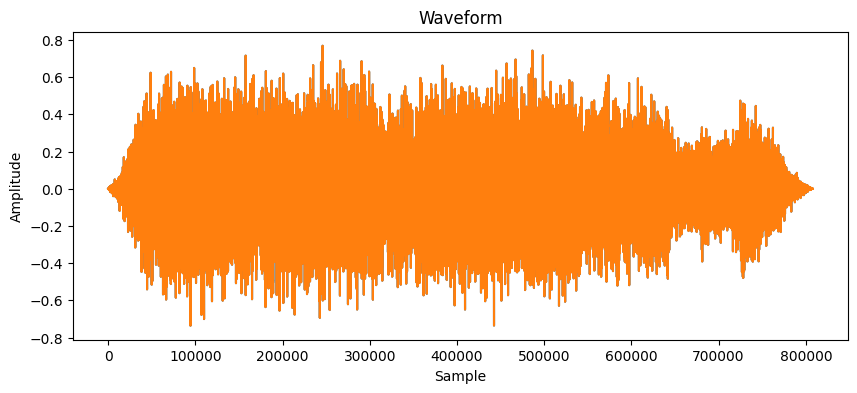

In [ ]:
import torchaudio
import matplotlib.pyplot as plt

def plot_waveform(waveform, sample_rate):
    plt.figure(figsize=(10, 4))
    plt.plot(waveform.t().numpy())
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.title('Waveform')
    plt.show()

# 예시 오디오 파일 로드
waveform, sample_rate = torchaudio.load('audio.wav')

# 오디오 파형 시각화
plot_waveform(waveform, sample_rate)


이제, 인공지능을 통해서 좀 더 진보적으로 , 해보면 어떨까요?


> VGGish(Visual Geometry Group's audio Embedding)는 오디오 신호를 다차원 임베딩 벡터로 변환하는 딥 러닝 모델입니다. 이 모델은 사전에 훈련된 컨벌루션 신경망(CNN)을 기반으로 하며, 주로 오디오 분류, 검색 및 유사성 평가를 위해 오디오 데이터에서 특징을 추출하는 데 사용됩니다.

VGGish는 오디오 스펙트로그램을 입력으로 사용하며, 이를 통해 주요 오디오 특징을 감지합니다. 모델은 사전 훈련된 가중치를 사용하여 오디오에서 특징을 추출하고, 이러한 특징을 이용하여 다양한 오디오 관련 작업을 수행할 수 있습니다.

주로 VGGish는 오디오 분류, 오디오 검색, 오디오 유사성 평가 등의 작업에 사용되며, 오디오 데이터를 효과적으로 처리하고 다룰 수 있는 강력한 도구로 인정받고 있습니다.

음성을 분류해보도록 하겠습니다.

In [ ]:
import torch

model = torch.hub.load('harritaylor/torchvggish', 'vggish')
model.eval()

# Download an example audio file
import urllib
url, filename = ("http://soundbible.com/grab.php?id=1698&type=wav", "bus_chatter.wav")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

model.forward(filename)

Using cache found in /root/.cache/torch/hub/harritaylor_torchvggish_master


tensor([[158.,  24., 142.,  ..., 218., 117., 255.],
        [162.,  37., 149.,  ..., 165.,   0., 255.],
        [160.,  30., 143.,  ..., 192., 191., 255.],
        ...,
        [157.,  37., 148.,  ..., 138., 189., 255.],
        [162.,  37., 155.,  ..., 156.,  14., 255.],
        [166.,  18., 156.,  ..., 172., 136., 255.]],
       grad_fn=<SqueezeBackward0>)